# Deriving Third-order Warming and Beam
Start from the Taylor series in time and convert temporal to spatial derivatives:
\begin{eqnarray}
\psi_{j}^{n+1}	&=&	\psi_{j}^{n}+\Delta t\frac{\partial\psi_{j}^{n}}{\partial t}+\frac{\Delta t^{2}}{2!}\frac{\partial^{2}\psi_{j}^{n}}{\partial t^{2}}+\frac{\Delta t^{3}}{3!}\frac{\partial^{3}\psi_{j}^{n}}{\partial t^{3}}+\left(\Delta t^{4}\right) \\
	&=&	\psi_{j}^{n}-u\Delta t\frac{\partial\psi_{j}^{n}}{\partial x}+u^{2}\frac{\Delta t^{2}}{2!}\frac{\partial^{2}\psi_{j}^{n}}{\partial x^{2}}-u^{3}\frac{\Delta t^{3}}{3!}\frac{\partial^{3}\psi_{j}^{n}}{\partial x^{3}}+O\left(\Delta t^{4}\right)
\end{eqnarray}

In order to find the derivatives, consider the cubic polinomial
$$
\psi=ax^{3}+bx^{2}+cx+d
$$
so that
\begin{eqnarray}
\psi^{\prime} &=& 3ax^{2} + 2bx + c\\
\psi^{\prime\prime} &=& 6ax+2b\\
\psi^{\prime\prime\prime} &=& 6a.
\end{eqnarray}
Then we assume that position $i$ is at $x=0$, then we get:
\begin{eqnarray}
\psi_{i} &=& d\\
\psi_{i}^{\prime} &=& c\\
\psi_{i}^{\prime\prime} &=& 2b\\
\psi_{i}^{\prime\prime\prime} &=& 6a.
\end{eqnarray}
Substituting positions $x_{i-3}=-3\Delta x$, $x_{i-2}=-2\Delta x$, $x_{i-1}=-\Delta x$ into the cubic polynomial gives
\begin{eqnarray}
\psi_{i-3}	&=&	-27a\Delta x^{3}+9b\Delta x^{2}-3c\Delta x+ d \\
\psi_{i-2}	&=&	-8a\Delta x^{3}+4b\Delta x^{2}-2c\Delta x+d \\
\psi_{i-1}	&=&	-a\Delta x^{3}+b\Delta x^{2}-c\Delta x + d \\
\psi_{i}	&=&	d
\end{eqnarray}
which can be solving using Gaussian elimination to find $a$, $b$ and $c$. This can assume $\Delta x = 1$ without loss of generality:

In [1]:
from sympy import *
from sympy.matrices import Matrix
from fractions import Fraction as F
d3pdx3, d2pdx2, dpdx = symbols("d3pdx3 d2pdx2 dpdx")
p3,p2,p1,p0 = symbols("p3,p2,p1,p0") # for psi_i-3, psi-i-2 ...
A = Matrix([[F(-27,6),F(9,2),-3,1],[F(-8,6),2,-2,1],[F(-1,6),F(1,2),-1,1],[0,0,0,1]])
psi = Matrix([p3,p2,p1,p0])
[d3pdx3, d2pdx2, dpdx, p0] = A.solve(psi)
print('d3pdx3 =',d3pdx3, '\nd2pdx2 =', d2pdx2, '\ndpdx =', dpdx,'\np0 =',p0)

d3pdx3 = p0 - 3*p1 + 3*p2 - p3 
d2pdx2 = 2*p0 - 5*p1 + 4*p2 - p3 
dpdx = 11*p0/6 - 3*p1 + 3*p2/2 - p3/3 
p0 = p0


In [2]:
# From this we can work out the explicit WB3e scheme
c = symbols("c")
WB3e = collect(expand(p0 - c*dpdx + c**2/2*d2pdx2 - c**3/6*d3pdx3), [p0,p1,p2,p3])
print('WB3e is ', WB3e)

WB3e is  p0*(-c**3/6 + c**2 - 11*c/6 + 1) + p1*(c**3/2 - 5*c**2/2 + 3*c) + p2*(-c**3/2 + 2*c**2 - 3*c/2) + p3*(c**3/6 - c**2/2 + c/3)


Therefore WB3e (the explcit scheme) is:
\begin{eqnarray}
\psi_j^{n+1} &=& \psi_j^n - \frac{c}{6}\left(11 - 6c + c^2\right)\psi_j^n 
                + \frac{c}{2}\left(6 - 5c + c^2\right)\psi_{j-1}^n\\
             &-& \frac{c}{2}\left(3 - 4c + c^2\right)\psi_{j-2}^n
              + \frac{c}{6}\left(2 - 3c + c^2\right)\psi_{j-3}^n
\end{eqnarray}

The implicit WB3i scheme is
\begin{eqnarray}
\psi_{j}^{n} &=& \psi_{j}^{n+1} - \Delta t\frac{\partial\psi_{j}^{n+1}}{\partial t}
        +\frac{\Delta t^{2}}{2!}\frac{\partial^{2}\psi_{j}^{n+1}}{\partial t^{2}}
        -\frac{\Delta t^{3}}{3!}\frac{\partial^{3}\psi_{j}^{n+1}}{\partial t^{3}}
        +\left(\Delta t^{4}\right) \\
\implies \psi_j^{n+1} &=& \psi_j^{n} + \Delta t\frac{\partial\psi_{j}^{n+1}}{\partial t}
        -\frac{\Delta t^{2}}{2!}\frac{\partial^{2}\psi_{j}^{n+1}}{\partial t^{2}}
        +\frac{\Delta t^{3}}{3!}\frac{\partial^{3}\psi_{j}^{n+1}}{\partial t^{3}} \\
        &=& \psi_j^{n} -u \Delta t\frac{\partial\psi_{j}^{n+1}}{\partial x}
        -u\frac{\Delta t^{2}}{2!}\frac{\partial^{2}\psi_{j}^{n+1}}{\partial x^{2}}
        -u\frac{\Delta t^{3}}{3!}\frac{\partial^{3}\psi_{j}^{n+1}}{\partial x^{3}} \\
\end{eqnarray}

In [3]:
# The implicit WB3i scheme
WB3i = collect(expand(p0 - c*dpdx - c**2/2*d2pdx2 - c**3/6*d3pdx3), [p0,p1,p2,p3])
print('WB3i is ', WB3i)

WB3i is  p0*(-c**3/6 - c**2 - 11*c/6 + 1) + p1*(c**3/2 + 5*c**2/2 + 3*c) + p2*(-c**3/2 - 2*c**2 - 3*c/2) + p3*(c**3/6 + c**2/2 + c/3)


Therefore the WB3i is
\begin{eqnarray}
\psi_j^{n+1} &=& \psi_j^n - \frac{c}{6}\left(11 + 6c + c^2\right)\psi_j^{n+1} 
                + \frac{c}{2}\left(6 + 5c + c^2\right)\psi_{j-1}^{n+1}\\
             &-& \frac{c}{2}\left(3 + 4c + c^2\right)\psi_{j-2}^{n+1}
              + \frac{c}{6}\left(2 + 3c + c^2\right)\psi_{j-3}^{n+1}
\end{eqnarray}

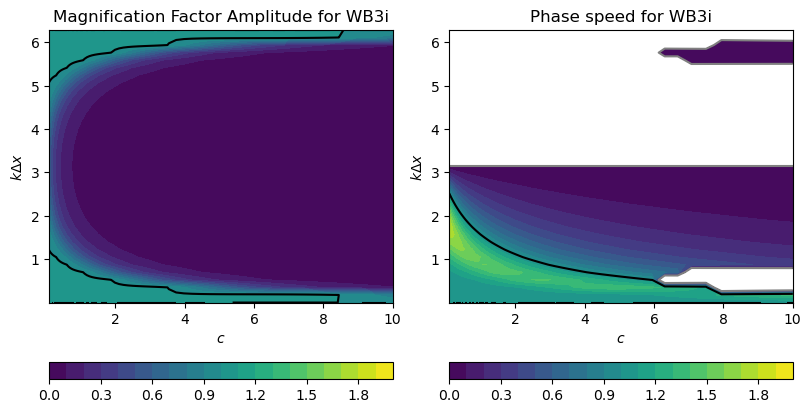

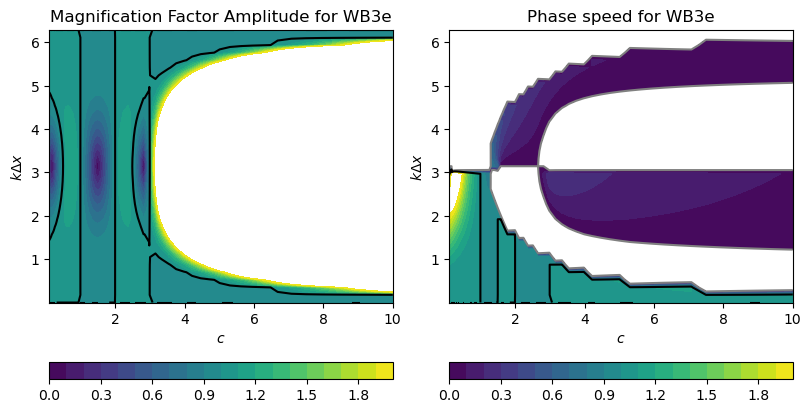

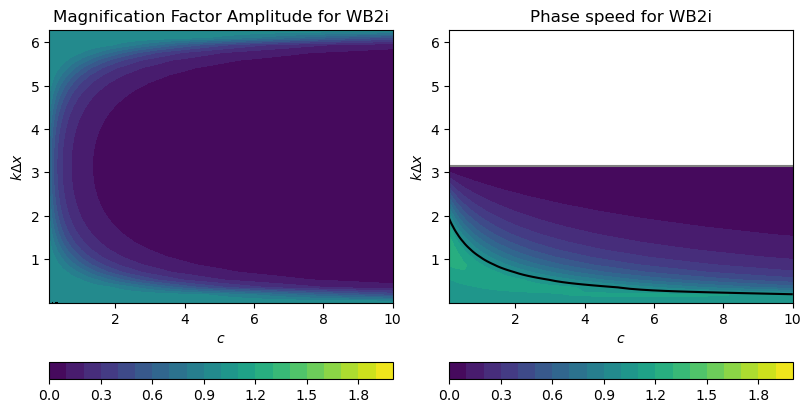

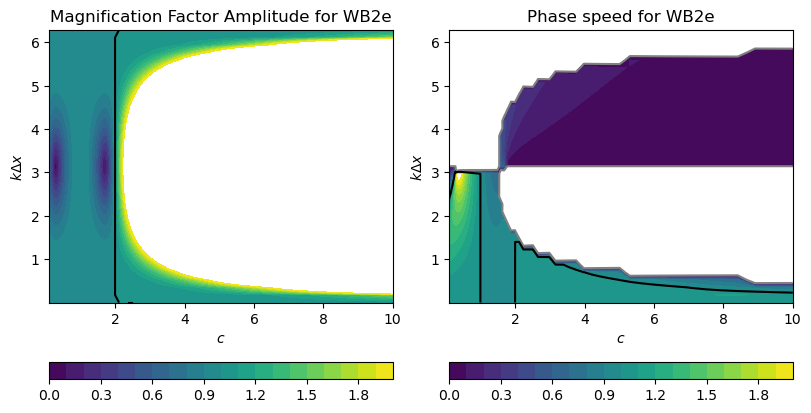

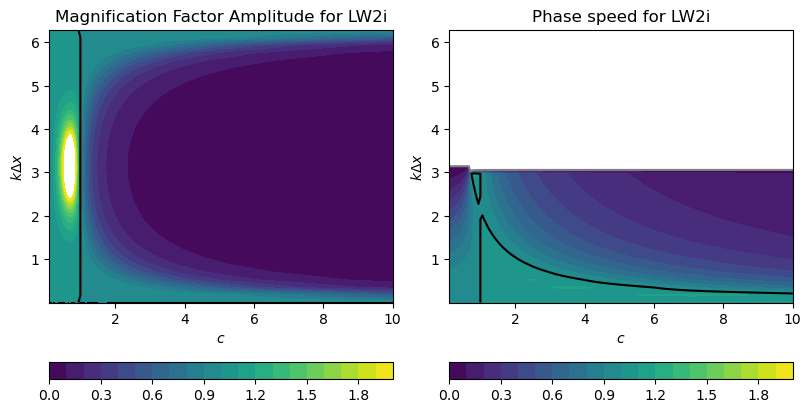

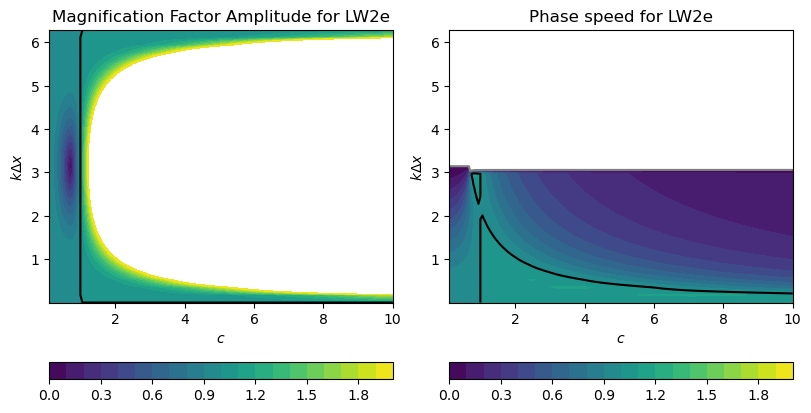

In [4]:
# Stability Analysis of various schemes
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import sys
sys.path.append('analysis')
import WBstabilityFunctions as WB
import LWstabilityFunctions as LW

As =     [WB.A_WB3i, WB.A_WB3e, WB.A_full, WB.A_full, LW.A_full, LW.A_full]
titles = ["WB3i",    "WB3e",    "WB2i",    "WB2e",    "LW2i",   "LW2e"]
args = [None, None, [1,1], [0,1], [1,1], [0,1]]

kdxs = np.linspace(1e-6, 2*np.pi, 37)
cs = 10**(np.linspace(-1, 1, 81))
# for colourscale
levels=np.arange(0, 2.1, 0.1)
cnorm = colors.BoundaryNorm(levels, 150)
magA = np.zeros([len(kdxs), len(cs)])
uc = np.zeros([len(kdxs), len(cs)])
for i in range(len(As)):
    for ic in range(len(cs)):
        c = cs[ic]
        for ik in range(len(kdxs)):
            kdx = kdxs[ik]
            A = 0*1j
            if args[i] is None:
                A = As[i](c,kdx)
            else:
                A = As[i](c, *args[i], kdx)
            magA[ik,ic] = abs(A)
            uc[ik,ic] = -np.angle(A)/(c*kdx)
    fig,axs = plt.subplots(1,2, figsize=(8,4), layout='constrained')
    ax0plot = axs[0].contourf(cs, kdxs,magA, levels)#, norm=cnorm,
    #                 cmap='Greys', extend='both')
    fig.colorbar(ax0plot,ax=axs[0], orientation='horizontal')
    axs[0].contour(cs, kdxs, magA, [0, 1], colors=['k', 'k'])
    axs[0].set(xlabel=r'$c$', ylabel=r'$k\Delta x$', title = 'Magnification Factor Amplitude for '+titles[i])
    
    ax1plot = axs[1].contourf(cs, kdxs,uc, np.arange(0, 2.1, 0.1))
    fig.colorbar(ax1plot, ax=axs[1], orientation='horizontal')
    axs[1].contour(cs, kdxs, uc, [0, 1], colors=['grey', 'k'])
    axs[1].set(xlabel=r'$c$', ylabel=r'$k\Delta x$', title = 'Phase speed for '+titles[i])
    plt.show()